In [1]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Parámetros
a=0.1
b=0.1
c=14

#INITIAL CONDITION
x0=1.0
y0=1.0
z0=1.0

#
trainLen=1000
testLen=1000
#

x0_y0_z0=np.array([x0,y0,z0])

#t
t=np.arange(trainLen+testLen+1)
print(t)

[   0    1    2 ..., 1998 1999 2000]


In [3]:
def dx_y_z(x_y_z,t,a,b,c):
    x,y,z=x_y_z
    dx_dt=-z-y
    dy_dt=x+a*y
    dz_dt=b+z*(x-c)
    return np.array([dx_dt,dy_dt,dz_dt])

In [4]:
x_y_z=scipy.integrate.odeint(dx_y_z,x0_y0_z0, t,args=(a,b,c))
x=x_y_z[:,0]

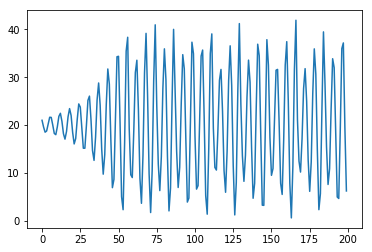

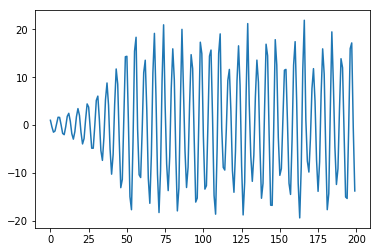

In [13]:
x_20=x+20
plt.plot(t[0:200],x_20[0:200])
plt.show()
plt.plot(t[0:200],x[0:200])
plt.show()

In [12]:
x_20=x+20
np.any(x_20<0)
x_20[x_20<0]

array([], dtype=float64)

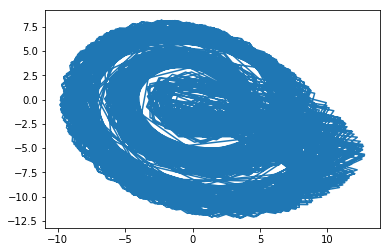

In [93]:
plt.plot(x_y_z[:,0], x_y_z[:,1])
plt.show()

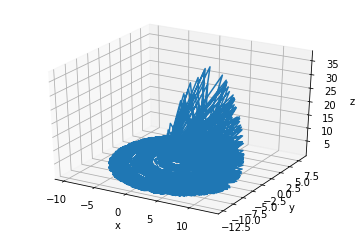

In [94]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x_y_z[:,0],x_y_z[:,1],x_y_z[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [95]:
def autocorr(x):
    result = scipy.signal.correlate(x, x, mode='full')
    result=result[result.size/2:]
    return result/result[0]

In [99]:
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

In [96]:
autocorr_x= scipy.signal.correlate(x_y_z[:,0], x_y_z[:,0], mode='full')

In [100]:
autocorr_x= estimated_autocorrelation(x_y_z[:,0])

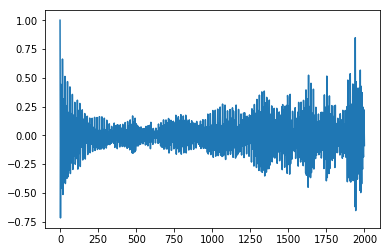

In [101]:
plt.plot(t,autocorr_x)
plt.show()